In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [114]:
profiles = pd.read_csv("CSV Files/customer_profiles.csv")
details = pd.read_csv("CSV Files/ad_details.csv")
events = pd.read_csv("CSV Files/ad_events.csv")

In [132]:
events = events.drop_duplicates(subset='customer', keep='first')

# Merge the datasets on the 'id' and 'customer' columns using outer join
df = pd.merge(profiles, events, left_on='id', right_on='customer', how='outer')

# Drop the duplicate 'customer' column
df = df.drop('id', axis=1)

df.insert(0, 'id', df.pop('customer'))

df = df.fillna(df.median())

In [133]:
for col in df.drop(['id', 'age', 'income', 'became_member_on (year month day)', 'time'], axis=1).columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [134]:
scaler = StandardScaler()
data = scaler.fit_transform(df.drop(['id'], axis=1))

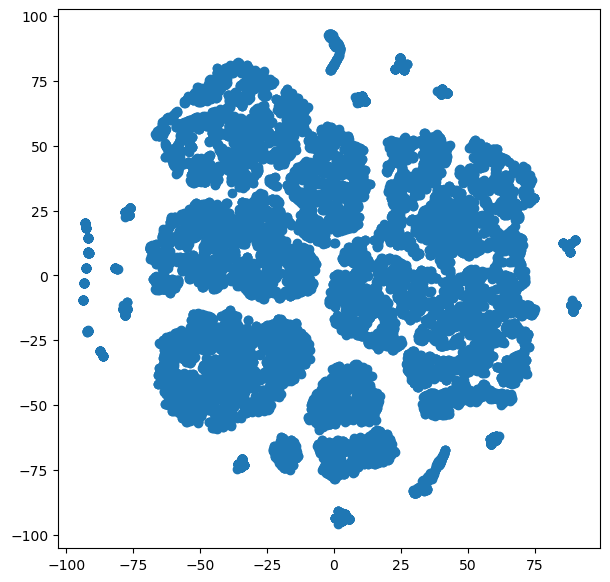

In [135]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [143]:
model = DBSCAN(eps=2, min_samples=10).fit(data)
segments = model.fit_predict(data)

In [144]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True

In [145]:
labels = model.labels_

In [146]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [147]:
print(n_clusters_)
print(n_noise_)

8
113


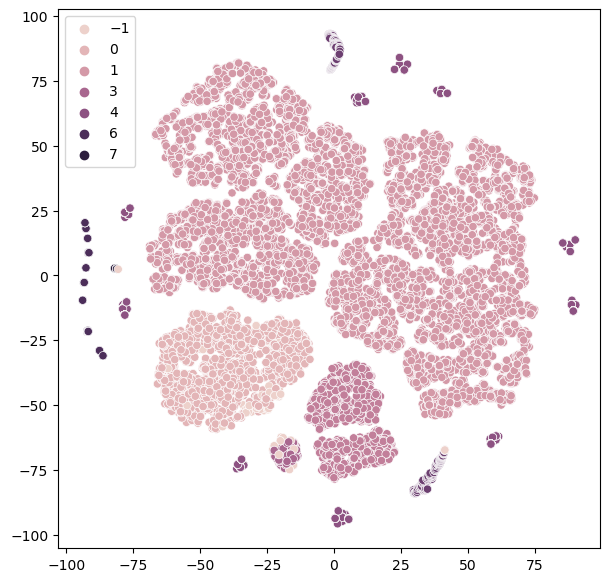

In [148]:
plt.figure(figsize=(7, 7))
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=segments)
plt.show()

In [149]:
sc = metrics.silhouette_score(data, labels)
print("Silhouette Coefficient:%0.4f" % sc)

Silhouette Coefficient:0.2521
